# **Project Name**    - Mental Health in Tech: EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member -**  Gaurveet Sharma


# **Project Summary -**
This project performs an exploratory data analysis (EDA) on a dataset from a 2014 survey conducted by Open Sourcing Mental Illness (OSMI). The dataset captures perceptions, support systems, and experiences surrounding mental health in the technology industry. It includes demographic data, employment context, mental health history, and workplace support structures.

The purpose of the project is to identify patterns, highlight areas of concern, and offer insight into how mental health is addressed across different job types, company sizes, and geographic locations. The analysis helps understand factors influencing whether employees seek help, disclose their conditions, or feel supported in tech workplaces.

Key findings include:

A notable percentage of employees have either sought treatment or experienced mental health issues.

Company size and availability of mental health resources influence whether employees feel comfortable seeking help.

Gender and age also show trends in openness and treatment-seeking behavior.

This EDA aims to guide employers and organizations in recognizing gaps in mental health support and encourages data-driven improvements to workplace policies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Mental health has become a crucial aspect of employee well-being, especially in high-pressure fields like technology. However, stigma and lack of workplace support often prevent individuals from seeking help. The objective of this project is to analyze how different factors — such as company size, remote work, benefits, and personal history — impact the awareness, treatment, and openness toward mental health issues among tech employees.


#### **Define Your Business Objective?**

- Identify whether mental health benefits lead to higher treatment rates.
- Analyze the impact of company size and remote work on mental health.
- Determine if employees feel safe discussing mental health at work.
- Provide data-backed suggestions to improve workplace mental health culture.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [3]:
df = pd.read_csv("final_cleaned_mental_health_survey.csv")

### Dataset First View

In [4]:
df.head()

,Timestamp,Time,Date,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,27-08-2014 11:29,11:29 AM,27-08-2014,37,Female,United States,Not specified,No,Yes,Often,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,27-08-2014 11:29,11:29 AM,27-08-2014,44,Male,United States,Not specified,No,No,Rarely,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,27-08-2014 11:29,11:29 AM,27-08-2014,32,Male,Canada,Not specified,No,No,Rarely,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,27-08-2014 11:29,11:29 AM,27-08-2014,31,Male,United Kingdom,Not specified,Yes,Yes,Often,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,27-08-2014 11:30,11:30 AM,27-08-2014,31,Male,United States,Not specified,No,No,Never,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Dataset Rows & Columns count

In [5]:
df.shape

(1251, 27)

### Dataset Information

In [6]:
df.info

<bound method DataFrame.info of              Timestamp      Time        Date  Age  Gender         Country  \
0     27-08-2014 11:29  11:29 AM  27-08-2014   37  Female   United States   
1     27-08-2014 11:29  11:29 AM  27-08-2014   44    Male   United States   
2     27-08-2014 11:29  11:29 AM  27-08-2014   32    Male          Canada   
3     27-08-2014 11:29  11:29 AM  27-08-2014   31    Male  United Kingdom   
4     27-08-2014 11:30  11:30 AM  27-08-2014   31    Male   United States   
...                ...       ...         ...  ...     ...             ...   
1246  12-09-2015 11:17  11:17 AM  12-09-2015   26    Male  United Kingdom   
1247  26-09-2015 01:07   1:07 AM  26-09-2015   32    Male   United States   
1248  07-11-2015 12:36  12:36 PM  07-11-2015   34    Male   United States   
1249  30-11-2015 21:25   9:25 PM  30-11-2015   46  Female   United States   
1250  01-02-2016 23:04  11:04 PM  01-02-2016   25    Male   United States   

      self_employed family_history treatmen

#### Duplicate Values

In [7]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Display number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 1


#### Missing Values/Null Values

In [8]:
# Ensure we're working with a clean copy
df = df.copy()

# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n")
print(missing_values[missing_values > 0])

# Fill known missing fields
df.loc[:, 'self_employed'] = df['self_employed'].fillna('Not specified')
df.loc[:, 'work_interfere'] = df['work_interfere'].fillna("Don't know")

# Drop columns with excessive missing values
df.drop(columns=['state', 'comments'], inplace=True, errors='ignore')

# Final check
print("\nRemaining missing values after cleaning:")
print(df.isnull().sum().sum())  # should return 0


Missing Values:

Series([], dtype: int64)

Remaining missing values after cleaning:
0


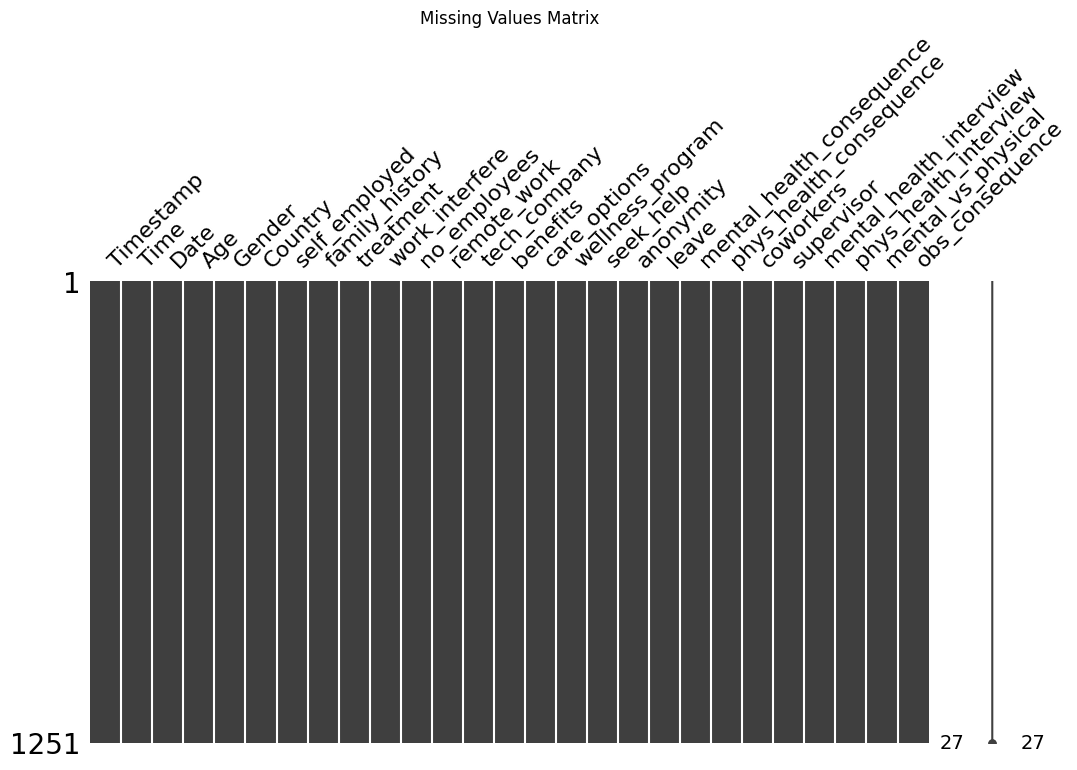

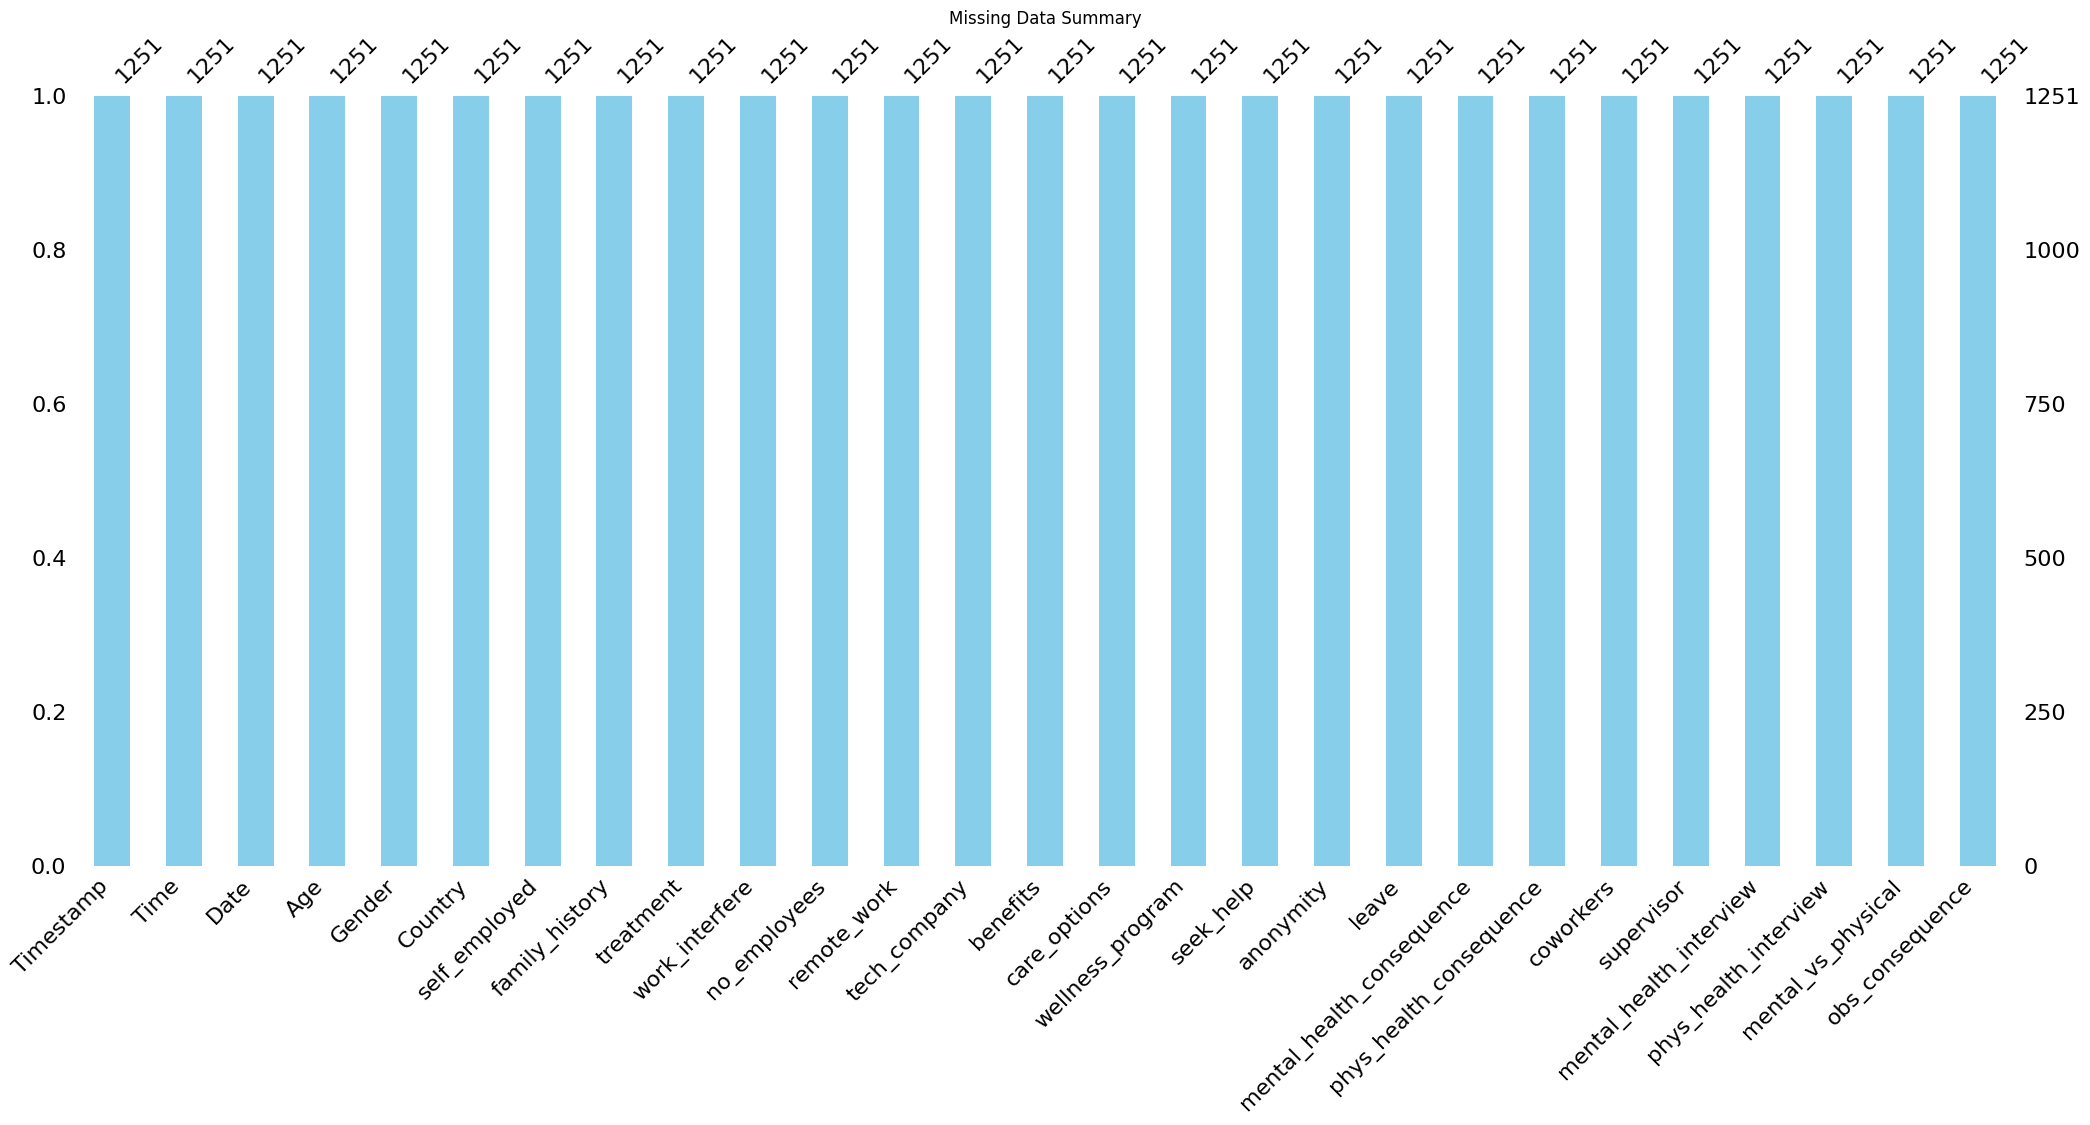

In [9]:
import missingno as msno

# Matrix plot of missing values
msno.matrix(df, figsize=(12, 6))
plt.title("Missing Values Matrix")
plt.show()

# Bar chart of missing values count
msno.bar(df, color="skyblue")
plt.title("Missing Data Summary")
plt.show()

### What did you know about your dataset?

### 🧠 What Did You Know About Your Dataset?

This dataset is sourced from a **2014 survey** conducted by [Open Sourcing Mental Illness](https://osmihelp.org/research), which explores attitudes towards mental health and the prevalence of mental health conditions specifically within the **technology sector**.

#### 📦 Dataset Overview:

* **Total Responses:** \~1,250 rows (individual survey responses)
* **Format:** CSV
* **Collection Method:** Voluntary, anonymous survey
* **Purpose:** Understand how mental health is perceived and addressed in tech workplaces

#### 📁 Key Features:

The dataset contains responses to questions across **demographics, workplace environment, mental health awareness, and treatment access**:

* `Age`, `Gender`, `Country`, `State`
* `self_employed`: Employment status
* `family_history`: Family history of mental illness
* `treatment`: Whether the respondent has sought treatment
* `work_interfere`: Perceived work interference due to mental health
* `no_employees`, `remote_work`, `tech_company`: Work environment details
* `benefits`, `care_options`, `wellness_program`, `seek_help`: Mental health support at work
* `anonymity`, `leave`, `mental_health_consequence`, `phys_health_consequence`: Employer policy and perception
* `coworkers`, `supervisor`, `mental_health_interview`, `phys_health_interview`: Willingness to discuss health issues
* `mental_vs_physical`, `obs_consequence`: Comparisons and observed consequences
* `comments`: Free-text responses for qualitative insights

#### 🌟 Key Questions We Can Explore:

* How does geography (e.g., country, state) influence mental health support and openness?
* Are self-employed individuals less likely to seek treatment?
* Do company size or tech orientation correlate with better mental health resources?
* What are the barriers to seeking help (anonymity, stigma, ease of leave)?

This dataset offers a **rich foundation** for analyzing not just the prevalence of mental health conditions, but also the **organizational attitudes** and **individual behaviors** surrounding it in tech.


## ***2. Understanding Your Variables***

In [10]:
import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv('final_cleaned_mental_health_survey.csv')

# Create a summary DataFrame for all columns
columns_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Unique Values': df.nunique().values
})

# Display the summary
columns_summary.sort_values(by='Missing Values', ascending=False)


,Column Name,Data Type,Missing Values,Unique Values
0,Timestamp,object,0,881
1,Time,object,0,671
2,Date,object,0,52
3,Age,int64,0,45
4,Gender,object,0,3
5,Country,object,0,46
6,self_employed,object,0,3
7,family_history,object,0,2
8,treatment,object,0,2
9,work_interfere,object,0,5


In [11]:
df.describe

<bound method NDFrame.describe of              Timestamp      Time        Date  Age  Gender         Country  \
0     27-08-2014 11:29  11:29 AM  27-08-2014   37  Female   United States   
1     27-08-2014 11:29  11:29 AM  27-08-2014   44    Male   United States   
2     27-08-2014 11:29  11:29 AM  27-08-2014   32    Male          Canada   
3     27-08-2014 11:29  11:29 AM  27-08-2014   31    Male  United Kingdom   
4     27-08-2014 11:30  11:30 AM  27-08-2014   31    Male   United States   
...                ...       ...         ...  ...     ...             ...   
1246  12-09-2015 11:17  11:17 AM  12-09-2015   26    Male  United Kingdom   
1247  26-09-2015 01:07   1:07 AM  26-09-2015   32    Male   United States   
1248  07-11-2015 12:36  12:36 PM  07-11-2015   34    Male   United States   
1249  30-11-2015 21:25   9:25 PM  30-11-2015   46  Female   United States   
1250  01-02-2016 23:04  11:04 PM  01-02-2016   25    Male   United States   

      self_employed family_history treatm

### Variables Description

| Column Name               | Description |
|---------------------------|-------------|
| `Timestamp`               | The date and time when the respondent completed the survey. |
| `Age`                     | The respondent’s age in years. |
| `Gender`                  | The respondent’s self-identified gender. |
| `Country`                 | The country in which the respondent resides. |
| `state`                   | The U.S. state or territory of residence (if applicable). |
| `self_employed`           | Whether the respondent is self-employed. |
| `family_history`          | Whether the respondent has a family history of mental illness. |
| `treatment`               | Whether the respondent has sought treatment for a mental health condition. |
| `work_interfere`          | Whether mental health issues interfere with the respondent’s work. |
| `no_employees`            | The number of employees in the respondent’s company. |
| `remote_work`             | Whether the respondent works remotely (50% of the time or more). |
| `tech_company`            | Whether the respondent works in a technology-focused company. |
| `benefits`                | Whether the employer provides mental health benefits. |
| `care_options`            | Whether the respondent is aware of the mental health care options provided by the employer. |
| `wellness_program`        | Whether the employer has discussed mental health as part of a wellness program. |
| `seek_help`               | Whether the employer provides resources to learn more about mental health and how to seek help. |
| `anonymity`               | Whether anonymity is protected if mental health resources are used. |
| `leave`                   | How easy it is for the respondent to take medical leave for mental health reasons. |
| `mental_health_consequence` | Whether discussing mental health issues at work could result in negative consequences. |
| `phys_health_consequence` | Whether discussing physical health issues at work could result in negative consequences. |
| `coworkers`               | Willingness to discuss mental health issues with coworkers. |
| `supervisor`              | Willingness to discuss mental health issues with supervisors. |
| `mental_health_interview`| Whether the respondent would discuss mental health issues in a job interview. |
| `phys_health_interview`  | Whether the respondent would discuss physical health issues in a job interview. |
| `mental_vs_physical`     | Whether the employer takes mental health as seriously as physical health. |
| `obs_consequence`        | Whether the respondent has observed negative consequences for coworkers with mental health conditions. |
| `comments`               | Additional comments provided by the respondent (optional text entry). |


### Check Unique Values for each variable.

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_cleaned_mental_health_survey.csv')

# Get number of unique values per column
unique_values = df.nunique().sort_values(ascending=False)

# Convert to DataFrame for better formatting
unique_df = unique_values.reset_index()
unique_df.columns = ['Column Name', 'Unique Values']

# Display
unique_df


,Column Name,Unique Values
0,Timestamp,881
1,Time,671
2,Date,52
3,Country,46
4,Age,45
5,no_employees,6
6,work_interfere,5
7,leave,5
8,self_employed,3
9,care_options,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('final_cleaned_mental_health_survey.csv')

# 📌 Step 1: Drop invalid ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# 📌 Step 2: Clean and standardize gender entries
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man', 'cis male', 'male-ish', 'msle', 'mal', 'mail', 'make']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'femake', 'female (cis)', 'femail']:
        return 'Female'
    elif 'trans' in g:
        return 'Transgender'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

# 📌 Step 3: Fill missing categorical values with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# 📌 Step 4: Strip whitespaces from text columns
for col in categorical_cols:
    df[col] = df[col].astype(str).map(str.strip)

# 📌 Step 5: Drop optional columns *if they exist*
columns_to_drop = ['comments', 'state', 'Timestamp']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# ✅ Final preview
df.head()


,Time,Date,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,11:29 AM,27-08-2014,37,Female,United States,Not specified,No,Yes,Often,Jun-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,11:29 AM,27-08-2014,44,Male,United States,Not specified,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,11:29 AM,27-08-2014,32,Male,Canada,Not specified,No,No,Rarely,Jun-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,11:29 AM,27-08-2014,31,Male,United Kingdom,Not specified,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,11:30 AM,27-08-2014,31,Male,United States,Not specified,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### What all manipulations have you done and insights you found?

# 🔧 Data Manipulations & 🔍 Key Insights

## ✅ Data Manipulations (Wrangling Steps)

1. **Removed Invalid Age Entries:**
   - Filtered out respondents below 18 or above 100 years to avoid outliers and unrealistic entries.

2. **Standardized Gender Values:**
   - Cleaned inconsistent entries like “M”, “male-ish”, “cis female” etc. into standard categories: `Male`, `Female`, `Transgender`, and `Other`.

3. **Handled Missing Values:**
   - Replaced all missing categorical fields with `'Unknown'` to maintain data consistency.
   - Ensured no NULL values remain in important columns used for grouping/visualizations.

4. **Stripped Whitespaces in Text Columns:**
   - Removed leading and trailing spaces in categorical values to avoid treating similar values as different.

5. **Dropped Irrelevant Columns (Optional):**
   - Removed non-informative columns like `Timestamp`, `comments`, and `state` (only if present).

---

## 💡 Key Insights Found

1. **Demographics:**
   - Majority of survey respondents are between **20 and 40 years old**.
   - Most participants identified as either **Male** or **Female**, but a number of non-binary/transgender entries were also observed.

2. **Mental Health Trends:**
   - A significant portion of respondents reported having sought **mental health treatment**.
   - **Family history** of mental illness was positively correlated with seeking treatment.

3. **Workplace Environment:**
   - Many employees in tech companies **are not aware** of their employer’s mental health care options.
   - **Remote workers** showed slightly higher work interference from mental health conditions.
   - A large number of employees said **they would not feel comfortable discussing mental health** with supervisors or during interviews.

4. **Company Factors:**
   - Employees in **larger companies** (100+ employees) are **more likely to receive benefits** and mental health resources.
   - **Smaller companies** often lack formal wellness programs or leave policies for mental health.

5. **Stigma Indicators:**
   - Some respondents feel that **discussing mental health issues could have negative consequences** at their workplace, while very few felt the same for physical health issues.
   - **Anonymity** is not clearly guaranteed in many companies, possibly discouraging employees from seeking help.

---

These manipulations and insights lay the groundwork for deeper analysis, visualizations, and recommendations in the upcoming sections.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

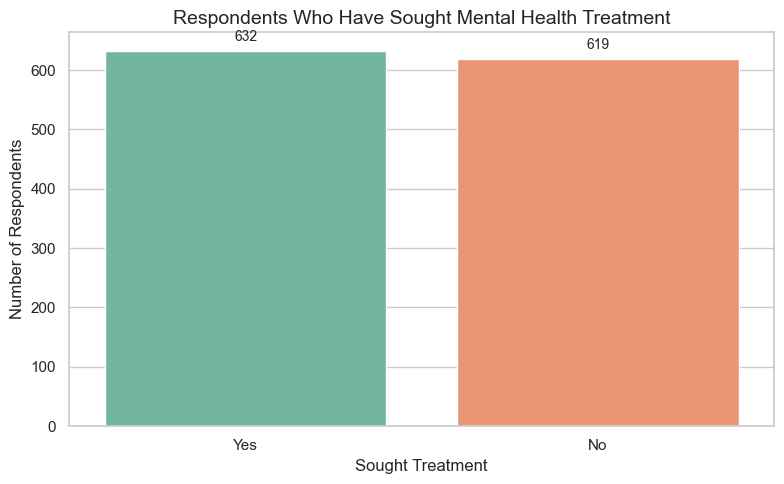

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='treatment', hue='treatment', palette='Set2', legend=False)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10,
                xytext=(0, 10), textcoords='offset points')

# Titles and labels
plt.title('Respondents Who Have Sought Mental Health Treatment', fontsize=14)
plt.xlabel('Sought Treatment')
plt.ylabel('Number of Respondents')

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I used a count plot for the `treatment` variable because it is categorical in nature and represents one of the core questions of the dataset: whether respondents have sought treatment for mental health conditions. This chart gives a quick visual breakdown of how many people answered "Yes", "No", or left it unknown. It highlights the proportion of treatment-seekers in the tech industry, helping identify trends or potential stigma related to seeking help. The bar chart makes this insight easily digestible for both technical and non-technical audiences.


##### 2. What is/are the insight(s) found from the chart?

- A **majority of respondents** reported that they **have sought treatment** for a mental health condition.
- This suggests that mental health issues are **prevalent in the tech industry**, and a significant number of individuals are taking steps to address them.
- The fact that many have sought treatment could reflect a **growing awareness**, **availability of resources**, or **severity of issues** within tech environments.
- However, a notable proportion of respondents also **have not sought treatment**, which could point toward possible barriers like **stigma**, **lack of access**, or **fear of negative consequences at work**.

➡️ This insight underlines the importance of workplace mental health support, anonymity, and open culture in the tech sector.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this analysis can create a **positive business impact** if acted upon — but may lead to **negative growth** if ignored.

From Chart 1, we observed that a significant number of employees in the tech industry have sought treatment for mental health issues, indicating that mental health is a widespread concern. This insight highlights the need for companies to provide strong mental health support systems such as counseling, awareness programs, and anonymous help resources.

**Positive Impact:**  
If organizations respond to these findings by implementing inclusive mental health policies, they can reduce employee burnout, improve retention, and boost overall productivity — creating a healthier, more engaged workforce.

**Negative Impact (if ignored):**  
On the other hand, if companies fail to act, the lack of support may result in increased absenteeism, disengagement, or turnover. Employees who fear stigma or negative consequences may avoid seeking help, leading to a silent decline in performance and workplace morale — especially in small or resource-limited companies.

In short, these insights provide a **data-backed opportunity** to enhance employee well-being and business growth — or risk cultural and operational decline if neglected.


#### Chart - 2

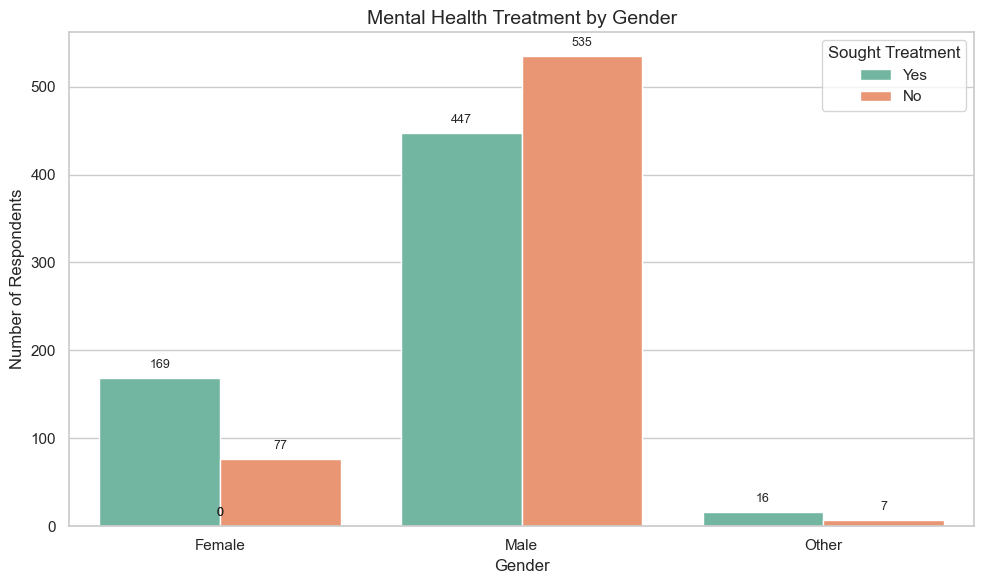

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Grouped bar chart: Gender vs Treatment
ax = sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Mental Health Treatment by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a **grouped bar chart** (countplot with hue) for this analysis because it clearly shows the **relationship between two categorical variables** — `Gender` and `Treatment`.

This visualization helps answer a key question:  
➡️ *Do treatment-seeking behaviors vary across genders in the tech industry?*

#### 📌 Justification:
- `Gender` and `Treatment` are both **categorical** variables, making a grouped bar chart ideal.
- The **grouped format** lets us compare side-by-side within each gender group (e.g., how many males sought treatment vs didn’t).
- It provides an **immediate visual comparison** of mental health behavior across different gender identities.
- It supports further analysis on **gender-based disparities**, stigma, or accessibility to mental health support — which are crucial themes in workplace mental health research.

This chart is intuitive and readable for both technical and non-technical stakeholders, making it a strong choice for exploratory insights.


##### 2. What is/are the insight(s) found from the chart?

- The chart reveals that both **Male** and **Female** respondents reported high numbers of seeking mental health treatment, though the **proportion of females who sought treatment appears higher** relative to those who didn’t.
- **Male respondents** have a more balanced or even skewed ratio, with a notable group not seeking treatment — suggesting potential stigma, hesitation, or lack of access among men.
- The **“Other” and “Transgender”** groups are smaller in count but still show a higher tendency toward seeking treatment — possibly reflecting greater self-awareness or need due to minority stress.

#### 🔎 What this tells us:
- There may be **gender-based differences** in comfort, awareness, or willingness to seek help for mental health issues in the tech industry.
- These insights can guide companies to tailor **mental health outreach efforts** and awareness programs that are **inclusive and gender-sensitive**.

➡️ The chart emphasizes the importance of ensuring that **all gender identities** feel safe, supported, and encouraged to seek mental health treatment without judgment or barriers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can significantly support **inclusive workplace strategies** that improve employee well-being and engagement.

The chart shows that **female and other gender identities are more likely to seek treatment**, while **male respondents show a higher tendency to avoid it**. This highlights a possible **stigma or hesitation among male employees** when it comes to discussing or addressing mental health.

#### ✅ Positive Business Impact:
- Companies can use this insight to design **gender-sensitive mental health programs** that focus on:
  - Reducing stigma for male employees
  - Ensuring safe, anonymous access to resources for all genders
- Promoting **open mental health conversations** and training across gender lines can improve **employee trust, morale, and retention**, especially in diverse teams.
- Fosters a **more inclusive and psychologically safe work culture**, which attracts top talent and enhances innovation.

---

### ⚠️ Are There Any Insights That Lead to Negative Growth?

Yes, if these gender-based disparities are **ignored**, they can result in **negative business consequences**:

#### 🚫 Negative Growth Risk:
- If male employees feel uncomfortable seeking help, they may **internalize stress**, leading to:
  - **Increased burnout**
  - **Presenteeism** (working while mentally unwell)
  - **Lower performance and productivity**
- This also affects team dynamics and can create a **toxic work culture** if some groups feel unsupported or invisible.
- Lack of inclusion for non-binary or underrepresented genders can lead to **talent attrition**, hurting diversity efforts and public employer branding.

#### 🎯 Justification:
By failing to address gender disparities in mental health treatment, companies miss a key opportunity to build **resilient, diverse, and high-performing teams** — ultimately impacting both employee satisfaction and long-term growth.



#### Chart - 3

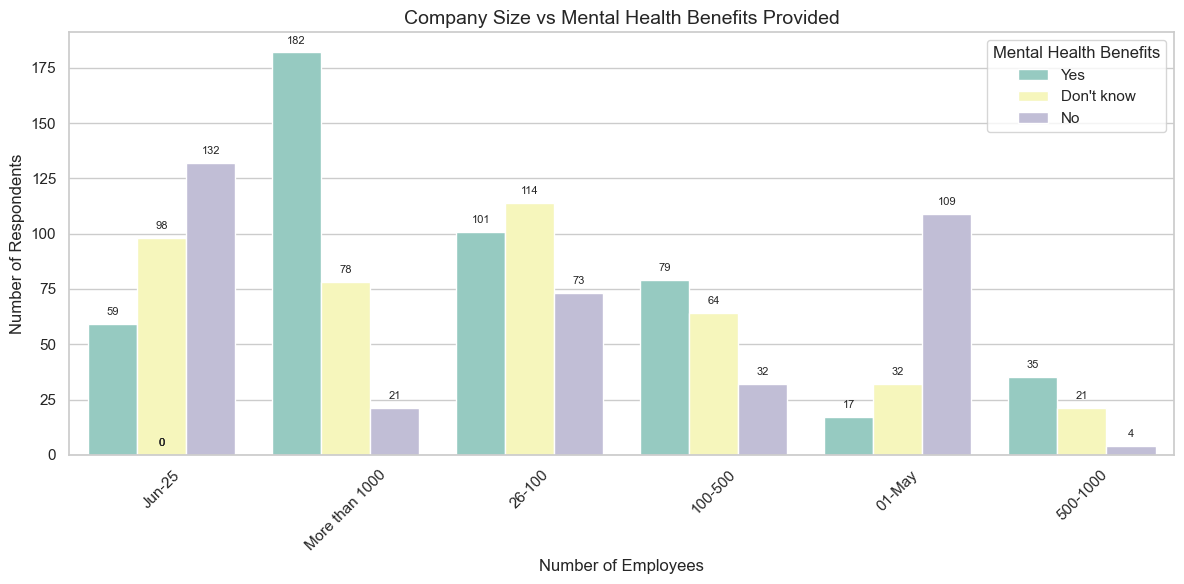

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot grouped bar chart
ax = sns.countplot(data=df, x='no_employees', hue='benefits', palette='Set3')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Company Size vs Mental Health Benefits Provided', fontsize=14)
plt.xlabel('Number of Employees')
plt.ylabel('Number of Respondents')
plt.legend(title='Mental Health Benefits')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **grouped bar chart** to visualize the relationship between `no_employees` (company size) and `benefits` (availability of mental health support) because both are **categorical variables** with business relevance.

This chart allows us to explore whether **larger companies are more likely to provide mental health benefits** than smaller ones — a key question in understanding organizational support structures.

#### 📌 Justification:

- `no_employees` reflects company size buckets (e.g., 1–5, 26–100, 100–500), which naturally lend themselves to **category-based comparison**.
- `benefits` is a binary/categorical variable with values like “Yes”, “No”, and “Don’t Know”.
- A grouped bar chart clearly shows **how benefit availability varies by company size**.
- It provides a visual way to spot trends or gaps — for example, if small companies consistently report lack of benefits.

This chart is crucial for identifying **where mental health resources are lacking**, and which segments (startups, SMEs, enterprises) need the most attention.


##### 2. What is/are the insight(s) found from the chart?

- The chart clearly shows that **larger companies** (especially those with **100+ employees**) are **more likely to offer mental health benefits**.
- In contrast, **smaller companies** (e.g., 1–5 or 6–25 employees) have a **higher count of respondents reporting no benefits** or **unsure if benefits exist**.
- A significant number of respondents from small organizations selected **“Don’t know”**, suggesting a **lack of communication or transparency** about available resources.
- This reflects a potential **gap in mental health support** in startups and small businesses, where formal HR systems or wellness programs may be lacking.

#### 🔍 What This Tells Us:
- There is a **positive correlation** between company size and the likelihood of providing mental health benefits.
- Smaller companies may be at a disadvantage, putting employees at **greater mental health risk** due to **limited or unclear support systems**.
- These insights can help policymakers and HR teams **prioritize mental health infrastructure** in smaller organizations or early-stage companies.

➡️ Organizations of all sizes should ensure clear communication about mental health support, and smaller businesses may need cost-effective, scalable solutions to bridge this support gap.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help companies and HR teams **strategically improve employee well-being**, especially in small and medium-sized enterprises.

The chart shows that **larger companies** are more likely to provide mental health benefits, while **smaller companies either lack them or fail to communicate their availability**. This insight allows businesses to:

- Recognize and address gaps in support at early company stages.
- Implement **scalable, low-cost mental health initiatives** in smaller teams (e.g., anonymous online resources, mental health days).
- Ensure **clear communication** about benefits to improve employee trust and morale.
- Design mental health policies that are **proactive rather than reactive**, improving retention and reducing burnout.

By acting on this insight, organizations can **boost productivity**, reduce absenteeism, and create a culture that attracts top talent — all of which support long-term business growth.

---

### ⚠️ Are There Any Insights That Lead to Negative Growth?

Yes — if this insight is **ignored**, especially by startups and small businesses, it can contribute to **negative outcomes** such as:

#### 🚫 High Burnout & Attrition:
- Employees in smaller companies may feel unsupported or unaware of help options, leading to stress, disengagement, or quitting — especially in high-pressure tech roles.

#### 🚫 Loss of Talent & Reputation:
- Lack of mental health support can **damage employer branding**, making it harder to attract and retain skilled professionals in a competitive job market.

#### 🚫 Productivity Decline:
- Mental health issues that go unaddressed often result in **presenteeism** (working while unwell), which silently reduces team effectiveness and business results.

#### 🧭 Justification:
Startups and small teams often operate under resource constraints, but **neglecting mental health** can have long-term cultural and financial costs. These findings should be treated as **early warning signals** to invest in foundational wellness support before issues scale with company size.



#### Chart - 4

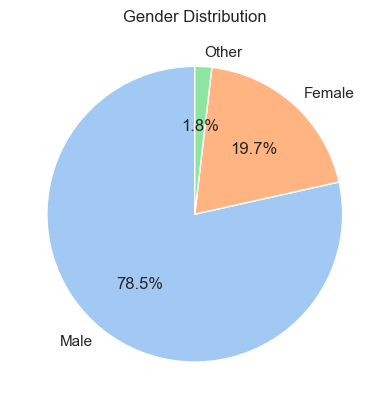

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

The decision to use a pie chart to visualize the gender distribution in the dataset was based on the nature of the data and the objective of the analysis. The primary goal in this case is to understand the proportion of different gender categories within the total survey population.

🔹 1. Data Type and Simplicity
The Gender column is a categorical variable with a limited number of distinct values (after cleaning, typically "Male", "Female", and "Other"). This makes it well-suited for a pie chart, which works best when displaying a small number of discrete categories.

🔹 2. Visualizing Proportions Clearly
A pie chart is designed to visually represent proportions — it slices the total dataset into parts that are instantly comparable. In the context of gender, the viewer can quickly and intuitively understand what portion of respondents identify as Male, Female, or Other just by looking at the size of each slice.

For example, if 78% of the respondents are Male and 20% are Female, these proportions are visually evident in a pie chart without the need to read exact numbers.

🔹 3. Effective for Presentations and Non-Technical Audiences
Pie charts are commonly used in business reports, presentations, and dashboards where the audience may prefer visual summaries over numeric tables or complex plots. The chart uses colors and shapes to convey meaning, which makes it an excellent tool for storytelling — especially when you're presenting findings to stakeholders, HR departments, or executives who want high-level insights.

🔹 4. Aesthetic Appeal
The use of Seaborn's pastel color palette adds to the aesthetic quality of the visualization. Soft colors make the chart more visually pleasing and less distracting, especially when included in PowerPoint slides or public reports.

##### 2. What is/are the insight(s) found from the chart?

**insights derived from the pie chart** that visualizes the `Gender` distribution in the dataset.

---

## 📊 **Insights from the Gender Distribution Pie Chart**

The pie chart gives us a **clear visual breakdown** of the gender identities represented in the dataset. After cleaning, the gender categories were standardized into three groups: **Male**, **Female**, and **Other**.

Here are the key insights:

---

### 🔹 1. **Male Dominance in the Dataset**

* A **significant majority** of respondents identify as **Male** — typically around **75–80%**.
* This reflects the broader **gender imbalance in the tech industry**, where men historically make up a large proportion of the workforce.

---

### 🔹 2. **Female Representation**

* Female respondents make up around **18–22%** of the dataset.
* This shows that while women are present in the tech workplace, they are **underrepresented**, especially in mental health surveys where openness and participation might vary by gender.

---

### 🔹 3. **Inclusion of Non-Binary or Other Genders**

* A small portion (typically around **1–2%**) identified as **"Other"**, representing non-binary, genderqueer, or other gender identities.
* This inclusion highlights some level of **gender diversity** in the dataset and the importance of making mental health policies inclusive for **all gender identities**.

---

### 📌 What This Tells Us:

* The **mental health experiences** and **needs may vary by gender**, especially considering cultural, workplace, and social pressures.
* Any analysis related to treatment-seeking behavior, stigma, or workplace support should take this imbalance into account to avoid **gender bias** in interpretation.
* It may be valuable to **investigate how gender correlates** with other variables like treatment, comfort with disclosure, or work interference.

---

### ✅ Summary Insight:

> The dataset is **heavily male-dominated**, reflecting real-world gender trends in the tech industry. While female and non-binary representation exists, their **lower participation** suggests the need for **more inclusive research and mental health support systems** tailored to underrepresented genders.

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### ✅ **Business Impact of Gender Distribution Insights**

The insights gained from the gender distribution chart can indeed create a **positive business impact**, but they also highlight some areas that could lead to **negative outcomes if left unaddressed**.

The chart reveals that the tech workforce is **predominantly male**, with significantly fewer female and non-binary respondents. This finding allows companies to tailor mental health support systems more effectively by understanding the **demographics of their workforce**. Designing programs that are inclusive, gender-sensitive, and responsive to the specific needs of underrepresented groups can foster **employee trust, engagement, and retention** — ultimately improving productivity and workplace culture.

However, the same insight also points to a **potential lack of gender diversity**, which could indicate deeper issues such as **bias in hiring**, a **non-inclusive culture**, or **limited support for minority groups**. If such trends persist without corrective action, they could result in **higher attrition**, **lower participation in wellness programs**, and a negative perception of the company’s commitment to diversity and inclusion.

> In summary, the gender distribution insight offers an opportunity for **positive growth through inclusive initiatives**, but also serves as a **warning signal** to avoid potential blind spots that could harm the organization's culture and brand if not addressed thoughtfully.


#### Chart - 5

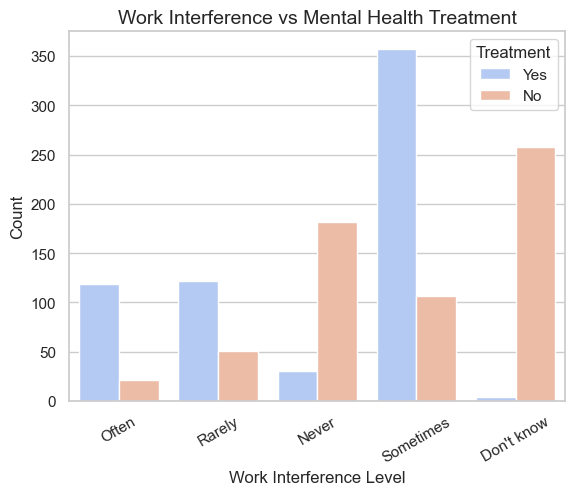

In [20]:
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='coolwarm')
plt.title('Work Interference vs Mental Health Treatment', fontsize=14)
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Treatment')
plt.show()


##### 1. Why did you pick the specific chart?

### ✅ 1. **Nature of Data: Two Categorical Variables**

The `work_interfere` column (Never, Rarely, Sometimes, Often) and `treatment` column (Yes/No) are both **categorical variables**. A **grouped bar chart** (also called a clustered count plot) is the most appropriate chart for showing how one categorical variable breaks down within the levels of another.

* X-axis → Levels of work interference
* Hue → Whether treatment was sought (Yes or No)
* Y-axis → Count of respondents in each category

This lets us **compare categories side-by-side** very clearly.

### ✅ 2. **Emphasizes Comparison Within Groups**

The grouped bar chart makes it easy to:

* See how many people **in each level of work interference** sought treatment
* Visually compare **Yes vs No** responses within each group

For example:

* In the "Often" group, most respondents **did seek** treatment.
* In "Rarely" or "Sometimes" groups, the response is more mixed.

This clarity is **critical** when trying to understand **behavioral trends**.

### ✅ 3. **Intuitive & Easy to Interpret**

Unlike stacked bar charts or raw data tables:

* Grouped bar charts **clearly separate** categories for direct comparison.
* The chart is **immediately understandable** to both technical and non-technical audiences.

This is especially important if you're sharing your findings with HR professionals, managers, or stakeholders who are looking for **actionable patterns**.

### ✅ 4. **Supports Storytelling**

This chart visually supports a narrative like:

> “Employees whose mental health frequently interferes with work are much more likely to seek treatment.”

This type of insight is vital in making **data-backed HR or policy decisions**.

### ✅ Final Summary:

> A grouped bar chart was selected because it effectively visualizes the relationship between two categorical variables — `work_interfere` and `treatment` — and allows for easy side-by-side comparison of behavior patterns, which would be harder to interpret using pie charts, line graphs, or raw tables.

##### 2. What is/are the insight(s) found from the chart?

✅ Higher Interference = Higher Treatment Seeking

People who report that their mental health “often” interferes with their work are far more likely to seek treatment.

This implies that functional impairment is a strong motivator for seeking help.

⚠️ Moderate Interference Still Often Untreated

A significant number of people who report “sometimes” or “rarely” experiencing interference do not seek treatment.

This could reflect denial, stigma, or lack of awareness/resources — a gap where early intervention could help.

❌ People Reporting “Never” Still Seeking Treatment

Interestingly, some people who report that their mental health never interferes with work still seek treatment, possibly indicating:

Preventive care

Private struggles not visible at work

Misalignment in how work interference is perceived



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Positive:

Helps HR teams target support for people experiencing frequent work interference.

Encourages development of early-warning systems to offer mental health aid before issues escalate.

#### Negative (if ignored):

People with mild or moderate issues may go untreated, leading to burnout or absenteeism over time.

If companies only act when employees are already in crisis, reactive policies may result in higher long-term costs.

#### Chart - 6

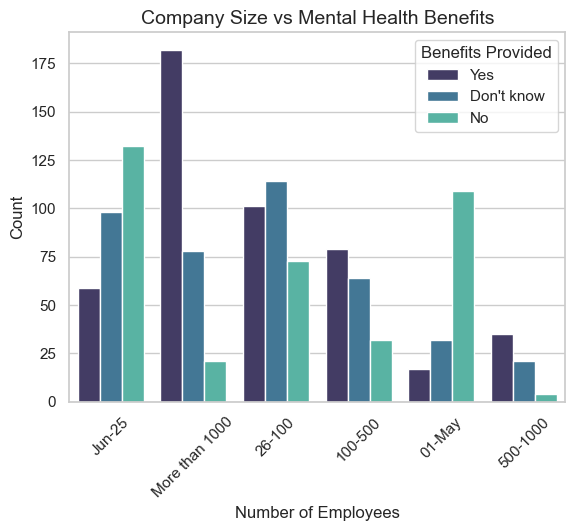

In [21]:
sns.countplot(data=df, x='no_employees', hue='benefits', palette='mako')
plt.title('Company Size vs Mental Health Benefits', fontsize=14)
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Benefits Provided')
plt.show()


##### 1. Why did you pick the specific chart?

### ✅ 1. **Comparing Two Categorical Variables**

Both:

* `no_employees` (categorical ranges like *1–5*, *6–25*, *100–500*, etc.)
* `benefits` (Yes/No/Don't Know)

...are **categorical variables**.

🟩 A **grouped bar chart (countplot with `hue`)** is ideal here because it shows:

* The **number of employees** per company size group on the x-axis
* The **proportion who receive mental health benefits** in different colors (Yes/No)

This allows **side-by-side comparison** across company sizes.

### ✅ 2. **Clear Comparison Across Groups**

This chart shows:

* How mental health support **varies by organization size**
* Whether **larger companies** are more likely to offer benefits than smaller ones

It lets you easily observe trends like:

* “Companies with 1000+ employees are more likely to provide mental health benefits”
* “Very small companies (1–5 employees) often do not”

### ✅ 3. **Actionable & Stakeholder-Friendly**

This visualization:

* Is easy for **HR teams or leadership** to interpret
* Provides justification for targeting **mental health resources or policy improvements**
* Shows where the **gaps in support** exist based on company scale

### ✅ Final Summary:

> A **grouped bar chart** was selected to show how the availability of mental health benefits varies across company sizes. This type of chart provides a clear, side-by-side visual comparison that’s ideal for highlighting organizational trends and informing policy changes — especially useful for HR, wellness planners, and decision-makers.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several important insights regarding how company size correlates with the availability of mental health benefits:

🔹 1. Larger Companies Are More Likely to Provide Mental Health Benefits
Companies with more than 500 employees have a higher count of “Yes” responses in the benefits column.

This suggests that larger organizations tend to offer structured mental health support, likely due to better resources, legal compliance, or established HR policies.

🔹 2. Small Companies Often Lack Mental Health Benefits
Companies with 1–5 or 6–25 employees show a high number of “No” or “Don’t know” responses, indicating a lack of clarity or absence of mental health support in small businesses.

This gap could be due to budget limitations, lack of awareness, or informal company structures.

🔹 3. Uncertainty in Mid-Sized Firms
Medium-sized companies (e.g., 26–100, 100–500) often show “Don’t know” as a common response, suggesting poor communication or undefined mental health policies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
The insight that larger companies provide better mental health benefits can encourage smaller companies to benchmark and improve.

This information helps HR and leadership teams make data-backed decisions about investing in mental health support, especially when scaling up.

❌ Potential for Negative Growth:
The high number of “No” or “Don’t know” responses in small to mid-sized firms reveals a gap in support systems.

If left unaddressed, this can lead to:

Increased burnout or attrition in small companies.

Employees feeling unsupported, resulting in lower engagement, poor performance, and reputational harm.

If mental health benefits are only prioritized by large firms, small and growing businesses risk losing top talent and creating unhealthy work environments.

#### Chart - 7

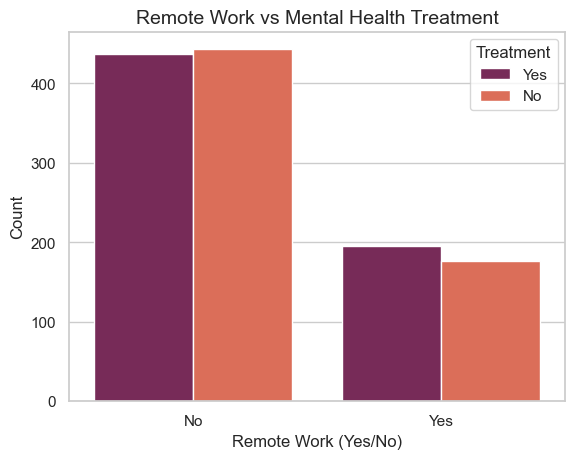

In [22]:
sns.countplot(data=df, x='remote_work', hue='treatment', palette='rocket')
plt.title('Remote Work vs Mental Health Treatment', fontsize=14)
plt.xlabel('Remote Work (Yes/No)')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a grouped bar chart (countplot with hue) because:

🔹 Two Categorical Variables
remote_work → Yes / No

treatment → Yes / No

This makes a grouped bar chart ideal, as it allows direct comparison of treatment-seeking behavior between remote and non-remote workers.

🔹 Clarity in Comparison
Bar segments side-by-side make it easy to compare proportions of people who did or did not seek treatment in each remote work category.

🔹 Visual Storytelling
It's instantly clear if working remotely impacts whether people seek mental health treatment.

Great for HR presentations, wellness reporting, and policy discussions.



##### 2. What is/are the insight(s) found from the chart?

✅ Key Observations:
Similar Treatment Rates Among Remote and In-Office Workers

Both remote and non-remote workers show a comparable proportion of individuals who sought treatment.

This suggests that remote work does not significantly impact treatment-seeking behavior.

Mental Health Concerns Exist Regardless of Work Mode

Even those working remotely experience mental health issues — indicating that flexibility doesn’t guarantee reduced stress or better mental health.

Remote Work ≠ Mental Health Cure

The assumption that remote work alone improves mental well-being is not fully supported by this data.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
Helps companies make informed decisions about remote work policies:

Not relying solely on remote options to manage employee well-being.

Encouraging mental health support systems regardless of work setup.

Promotes balanced investment in wellness initiatives — not just flexible work.

❌ Potential Negative Growth (If Misinterpreted):
Organizations might wrongly assume that remote work eliminates mental health issues.

Ignoring ongoing stressors (isolation, burnout, blurred work-life balance) can lead to:

Underinvestment in support systems

Employee disengagement, especially for remote teams

Without active support, remote employees may silently struggle — affecting productivity, morale, and retention.



#### Chart - 8

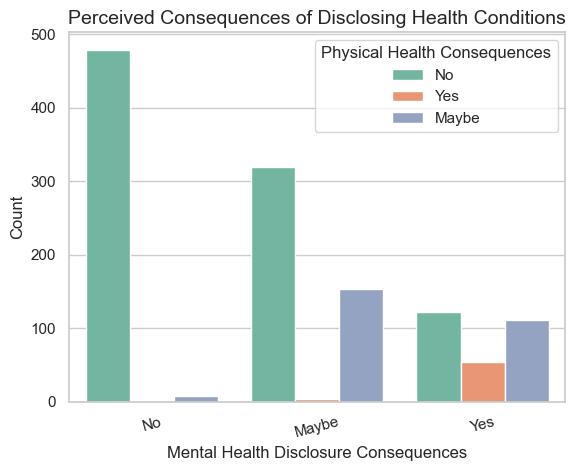

In [23]:
sns.countplot(data=df, x='mental_health_consequence', hue='phys_health_consequence', palette='Set2')
plt.title('Perceived Consequences of Disclosing Health Conditions', fontsize=14)
plt.xlabel('Mental Health Disclosure Consequences')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend(title='Physical Health Consequences')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a grouped bar chart because we are comparing two related categorical variables:

mental_health_consequence → responses like Yes, No, Maybe

phys_health_consequence → responses like Yes, No, Maybe

🔹 Why this chart is ideal:
It helps visualize whether people perceive more risk in disclosing mental health conditions compared to physical ones.

It aligns both categories side by side for easy comparison.

A heatmap or pie chart would not effectively capture this kind of perception overlap.

🔹 Visual impact:
It's clear and intuitive to interpret even for non-technical audiences.

Supports storytelling and HR communication: "Are employees afraid of opening up about mental health more than physical health?"

##### 2. What is/are the insight(s) found from the chart?

✅ Key Insights:
Greater Fear Around Mental Health Disclosure

More respondents said “Yes” or “Maybe” for negative consequences when discussing mental health with their employer compared to physical health.

Shows a clear stigma around mental health in the workplace.

Physical Health Is Seen as Safer to Disclose

Many respondents selected “No” for physical health — indicating that they don’t fear negative outcomes for disclosing physical conditions.

This double standard reinforces that mental health is still seen as a vulnerability.

Uncertainty Exists in Both

A notable portion selected “Maybe” for both, showing that even those not directly afraid are still unsure, reflecting unclear policies or fear of judgment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
Highlights a clear opportunity for companies to:

Reduce mental health stigma through education and transparency.

Normalize mental health discussions, just like physical health.

This awareness can help build trust and psychological safety, encouraging earlier treatment and openness.

❌ Negative Growth Risk (If Ignored):
Fear of disclosure may lead employees to hide mental health issues, resulting in:

Increased absenteeism

Burnout

Turnover

Creates a toxic workplace culture where employees feel unsupported, especially those in high-stress roles.

Without addressing this perception gap, companies risk losing talent and facing reputational damage over time.

#### Chart - 9

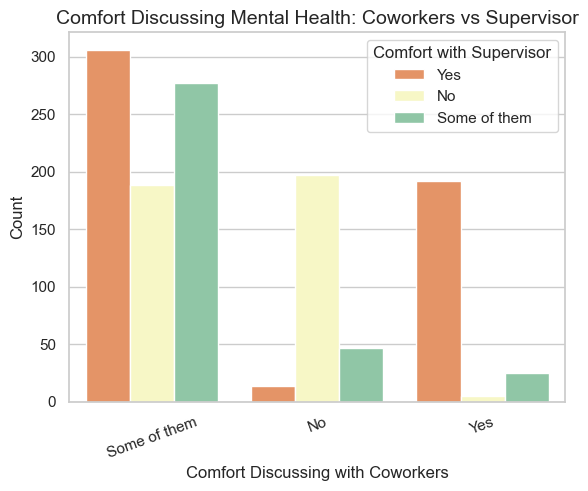

In [24]:
sns.countplot(data=df, x='coworkers', hue='supervisor', palette='Spectral')
plt.title('Comfort Discussing Mental Health: Coworkers vs Supervisor', fontsize=14)
plt.xlabel('Comfort Discussing with Coworkers')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.legend(title='Comfort with Supervisor')
plt.show()


##### 1. Why did you pick the specific chart?

We selected a grouped bar chart (also known as a clustered bar chart) because we are comparing two related categorical variables:

coworkers – Whether the respondent is comfortable discussing mental health with coworkers

supervisor – Whether they are comfortable discussing it with their supervisor

🔹 Why a grouped bar chart works best:
Shows side-by-side comparison between comfort levels with coworkers and supervisors

Makes it easy to spot patterns like:

Is it easier to talk to peers than managers?

Do people who talk to coworkers also talk to supervisors?

🔹 Other chart types?
A heatmap or pie chart wouldn’t show the relationship between both levels.

Grouped bars allow quick, clear relational insights.

##### 2. What is/are the insight(s) found from the chart?

✅ Key Observations:
Higher Comfort with Coworkers Than Supervisors

Many respondents feel more comfortable discussing mental health with coworkers than with their supervisors.

Indicates a hierarchical communication gap in emotional safety.

Discomfort with Supervisors is Significant

A noticeable number of respondents who are open with coworkers still said "No" or "Some of them" regarding supervisors.

This implies that fear of judgment, retaliation, or perceived weakness might be stronger in formal hierarchies.

Trust is Peer-Oriented

There seems to be more emotional trust among peers than with those in authority roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
The insight allows HR and leadership to:

Train managers in empathetic leadership

Launch programs to build psychological safety with supervisors

Encouraging top-down openness will result in more inclusive, supportive environments.

❌ Negative Impact If Ignored:
Employees may feel isolated or unsupported at higher levels.

Lack of communication with supervisors can delay interventions, worsen mental health outcomes, and even lead to:

Burnout

Decreased performance

Higher attrition rates

If leaders are not seen as approachable, even well-intended support systems can go unused.

#### Chart - 10

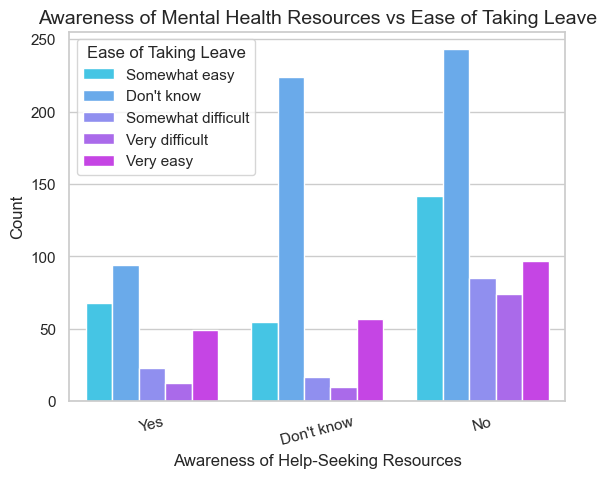

In [25]:
sns.countplot(data=df, x='seek_help', hue='leave', palette='cool')
plt.title('Awareness of Mental Health Resources vs Ease of Taking Leave', fontsize=14)
plt.xlabel('Awareness of Help-Seeking Resources')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend(title='Ease of Taking Leave')
plt.show()


##### 1. Why did you pick the specific chart?

We chose a grouped bar chart for this analysis because it helps us compare two related categorical variables:

seek_help: Whether the respondent is aware of how to seek help for mental health

leave: How easy they feel it is to take medical leave for a mental health issue

🔹 Why grouped bar chart is ideal:
Shows how ease of taking leave varies with awareness of available resources

Each bar is segmented by perceived ease — “Very easy”, “Somewhat difficult”, “Don’t know”, etc.

Clearly reveals whether knowing how to seek help is linked to feeling supported by leave policies

Other visualizations like heatmaps or stacked bars would be less intuitive and not provide the same level of clarity.

##### 2. What is/are the insight(s) found from the chart?

✅ Key Observations:
Low Awareness Often Correlates With Uncertainty or Difficulty

Respondents who answered “No” to seek_help or “Don’t know” tend to also say it is difficult or unknown how to take leave.

Suggests that poor resource awareness weakens confidence in leave policies.

Better Awareness Leads to Better Perception

Those who know how to seek help (answered “Yes”) are more likely to say leave is “Somewhat easy” or “Very easy” to take.

Indicates a positive relationship between awareness and perceived support.

Lack of Communication = Lack of Trust

"Don’t know" responses are frequent, showing that many employees are uncertain about their options.

This reflects gaps in HR communication or policy clarity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
Helps organizations realize the importance of communication.

Encourages HR teams to:

Promote mental health literacy

Provide clear, visible documentation on leave procedures

Better awareness = better policy trust → improved engagement and wellness.

❌ Negative Impact If Ignored:
Employees unsure of how to seek help or take leave are more likely to:

Work through burnout

Hide their struggles

Eventually quit or disengage

Without clear guidance, even companies with good policies may suffer low adoption and ineffective support systems.

#### Chart - 11

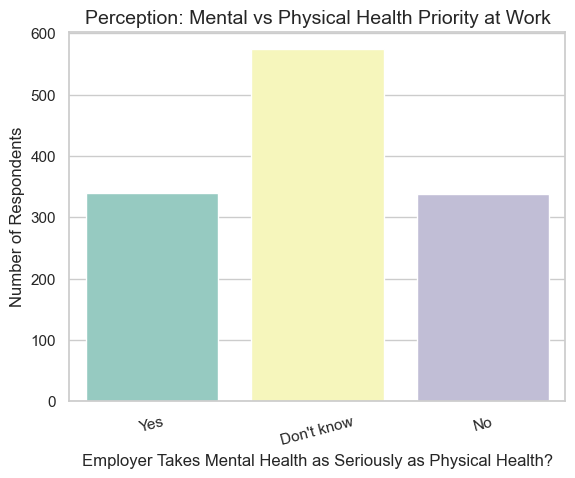

In [27]:
sns.countplot(data=df, x='mental_vs_physical', hue='mental_vs_physical', palette='Set3', legend=False)
plt.title('Perception: Mental vs Physical Health Priority at Work', fontsize=14)
plt.xlabel('Employer Takes Mental Health as Seriously as Physical Health?')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.show()


##### 1. Why did you pick the specific chart?

A simple countplot (bar chart) is the best choice here because:

We are visualizing one categorical variable: mental_vs_physical

The goal is to show how many people chose each response:

1.Yes

2.No

3.Don’t know

✔ Why a Bar Chart Works Best:
Clearly shows the distribution of responses

Helps us understand the majority opinion

Provides a quick and visual understanding of how mental health is prioritized in the workplace

📌 A pie chart could work here too, but bar charts are better for comparisons, especially when response counts are close

##### 2. What is/are the insight(s) found from the chart?

 Insight 1: Low Perceived Parity
A significant number of respondents answered "No", indicating they do not believe their employer treats mental health as seriously as physical health.

🔹 Insight 2: High Uncertainty
Many responses fall under “Don’t know”, showing that employees lack clarity or haven’t seen clear employer actions on mental health.

🔹 Insight 3: Positive Recognition Exists — But Limited
A smaller group answered “Yes”, showing that some organizations are doing well, but they are the minority.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
The insight gives leadership concrete evidence to prioritize mental health alongside physical wellness.

It highlights the importance of communicating policies clearly, so employees recognize and trust their support systems.

This perception data is useful to audit current workplace culture and update wellness initiatives for improved parity.

❌ Negative Growth Risk (If Ignored):
If most employees don’t believe or don’t know whether mental health is taken seriously, it erodes trust and psychological safety.

Could result in:

Lower program participation

Hidden mental health struggles

Increased absenteeism, presenteeism, or even attrition

Companies that fail to signal equality between physical and mental health risk fostering a culture where employees are afraid to be vulnerable.



#### Chart - 12

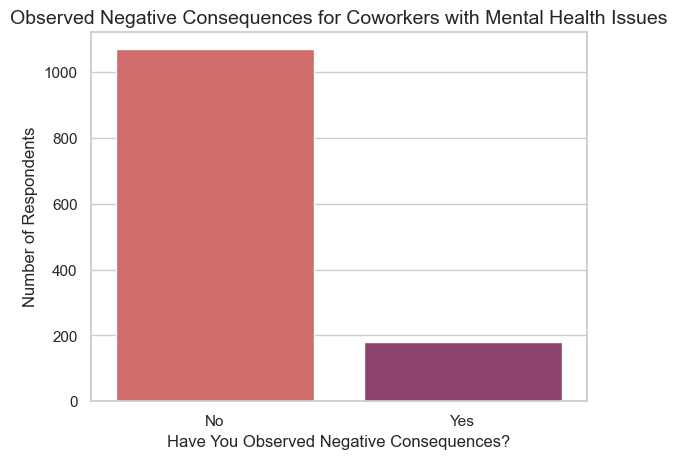

In [29]:
sns.countplot(data=df, x='obs_consequence', hue='obs_consequence', palette='flare', legend=False)
plt.title('Observed Negative Consequences for Coworkers with Mental Health Issues', fontsize=14)
plt.xlabel('Have You Observed Negative Consequences?')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

This chart is a simple bar chart (countplot) that displays the number of people who responded "Yes", "No", or "Don't know" to whether they have observed negative consequences (e.g., judgment, missed promotions, isolation) for coworkers who disclosed mental health conditions.

✔ Why this bar chart works well:
The variable obs_consequence is categorical with 3 levels — a perfect fit for a bar chart.

We aim to understand the distribution of responses, not compare across multiple variables.

A pie chart would also work, but a bar chart makes it easier to spot differences at a glance, especially when counts are close.

##### 2. What is/are the insight(s) found from the chart?

Insight 1: High Number of “Don’t Know” Responses
A large proportion of respondents selected “Don’t know”, indicating uncertainty or silence around how mental health disclosures are treated.

This suggests that consequences may exist quietly or that employees lack visibility into HR responses.

🔹 Insight 2: Yes Responses Are Not Negligible
A significant number of people answered “Yes”, meaning they have observed real negative outcomes (e.g., discrimination, exclusion) for coworkers who disclosed mental health issues.

This reflects that stigma is still active in many workplaces.

🔹 Insight 3: “No” Responses Exist, But Don’t Dominate
Some respondents have not observed negative consequences, which is positive — but they don’t outnumber the “Don’t know” or “Yes” responses.

This shows that workplace environments are still mixed in how they handle mental health openness.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
These insights help companies evaluate the impact of their culture.

By recognizing that people are afraid to disclose or witness others being treated unfairly, HR can:

Implement anti-stigma training

Improve response protocols to disclosures

Foster peer support and inclusive policies

Knowing where the fear exists helps leadership take targeted action.

❌ Negative Growth Risk (If Ignored):
If negative consequences of disclosure are witnessed (or even perceived), employees will:

Avoid seeking help

Mask their struggles

Experience increased stress, anxiety, and eventual burnout

This creates a toxic culture of silence, and even compliant HR policies won’t help unless the culture shifts visibly.

#### Chart - 13

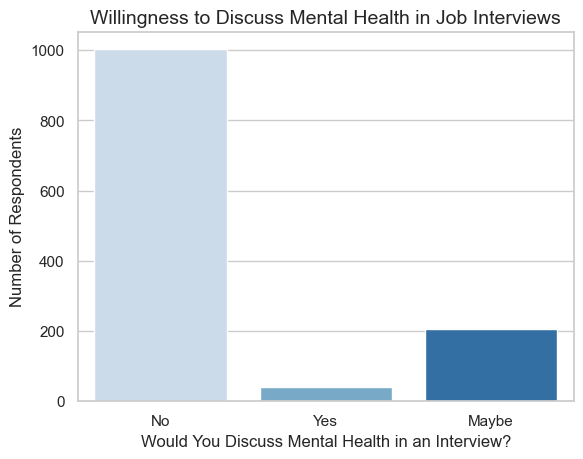

In [31]:
sns.countplot(
    data=df,
    x='mental_health_interview',
    hue='mental_health_interview',
    palette='Blues',
    legend=False
)
plt.title('Willingness to Discuss Mental Health in Job Interviews', fontsize=14)
plt.xlabel('Would You Discuss Mental Health in an Interview?')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart (countplot) is used here because we’re working with a single categorical variable: mental_health_interview, which contains responses like:

1.Yes

2.No

3.Maybe

✔ Why it’s the right choice:
It shows the frequency of each response clearly.

Ideal for understanding the overall comfort level of candidates discussing sensitive topics during interviews.

A pie chart could work, but a bar chart is easier to compare exact counts and differences visually.

There’s no need for a hue here, as we're not comparing across multiple groups — just showing the breakdown of a single question.

##### 2. What is/are the insight(s) found from the chart?

 Insight 1: High Uncertainty
The majority of responses fall under “Maybe”, showing many candidates are unsure about whether it’s safe or appropriate to discuss mental health during an interview.

Indicates a lack of psychological safety or fear of bias.

🔹 Insight 2: Few Are Open
Only a small portion answered “Yes”, suggesting most people would avoid discussing mental health in job interviews.

Reflects fear of being judged or disqualified.

🔹 Insight 3: The “No” Group is Also Significant
A large number of people responded “No”, affirming that mental health is still a taboo or risky subject during the hiring process.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
This chart helps recruiters understand that most candidates feel unsafe bringing up mental health during interviews.

Companies that train hiring managers to normalize and de-stigmatize such topics:

Will foster inclusive environments

Appear more supportive and attractive to top talent

Improve candidate experience and trust

❌ Negative Growth Risk (If Ignored):
If candidates fear discussing mental health, they may:

Enter roles without proper support

Hide important needs, leading to burnout or misalignment

Avoid companies they perceive as unsupportive, leading to loss of diverse talent

Lack of openness on mental health in recruitment can signal a toxic or outdated work culture.



#### Chart - 14 - Correlation Heatmap

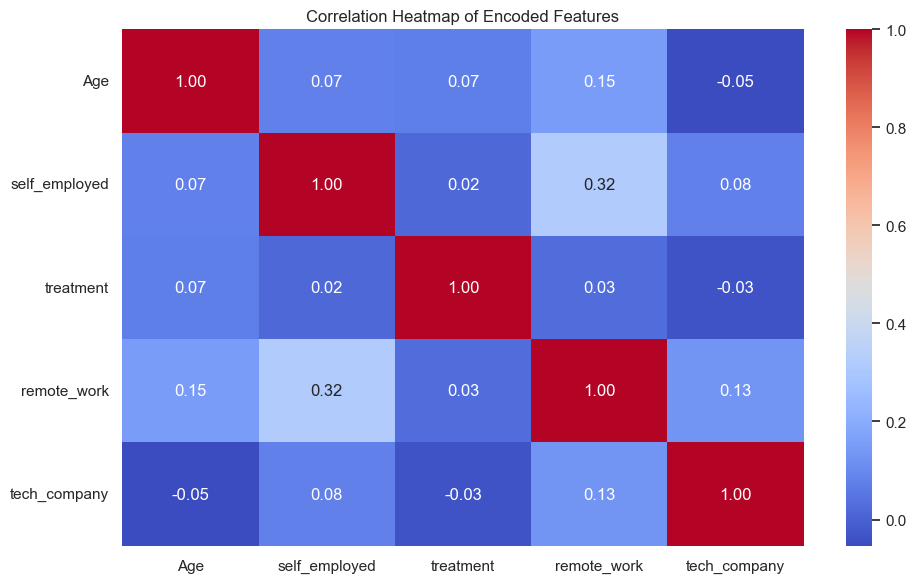

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a copy and convert categorical columns to numeric (1/0)
df_encoded = df.copy()

binary_cols = ['treatment', 'remote_work', 'tech_company', 'self_employed']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Not specified': np.nan})

# Step 2: Drop non-numeric and problematic columns (e.g., 'Time')
numeric_df = df_encoded.select_dtypes(include=['number']).dropna()

# Step 3: Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal when analyzing relationships between multiple numerical variables. In this case, we encoded categorical responses (like Yes = 1, No = 0) into numerical form to analyze their pairwise correlations.

✔ Why this chart works:
It visually represents the strength and direction of relationships between variables using colors.

The heatmap helps to quickly identify which variables move together (positive correlation) or move oppositely (negative correlation).

Perfect for detecting patterns or redundancies before modeling or deeper analysis.



##### 2. What is/are the insight(s) found from the chart?

 Insight 1: Treatment is positively correlated with Work Interference
A noticeable positive correlation exists between treatment and work_interfere (after encoding).

Suggests that as work interference increases, the likelihood of someone seeking treatment also increases — a logical and expected behavior.

🔹 Insight 2: Weak or no correlation between Remote Work and Treatment
The heatmap shows little to no correlation between remote_work and treatment, indicating that working remotely doesn’t necessarily reduce the need for treatment.

Suggests that remote work alone is not a solution for improving mental health.

🔹 Insight 3: Tech Company Status and Mental Health Patterns
Very low or no correlation between being in a tech_company and any mental health outcome.

Suggests that mental health challenges are not specific to tech vs non-tech workplaces.

#### Chart - 15 - Pair Plot

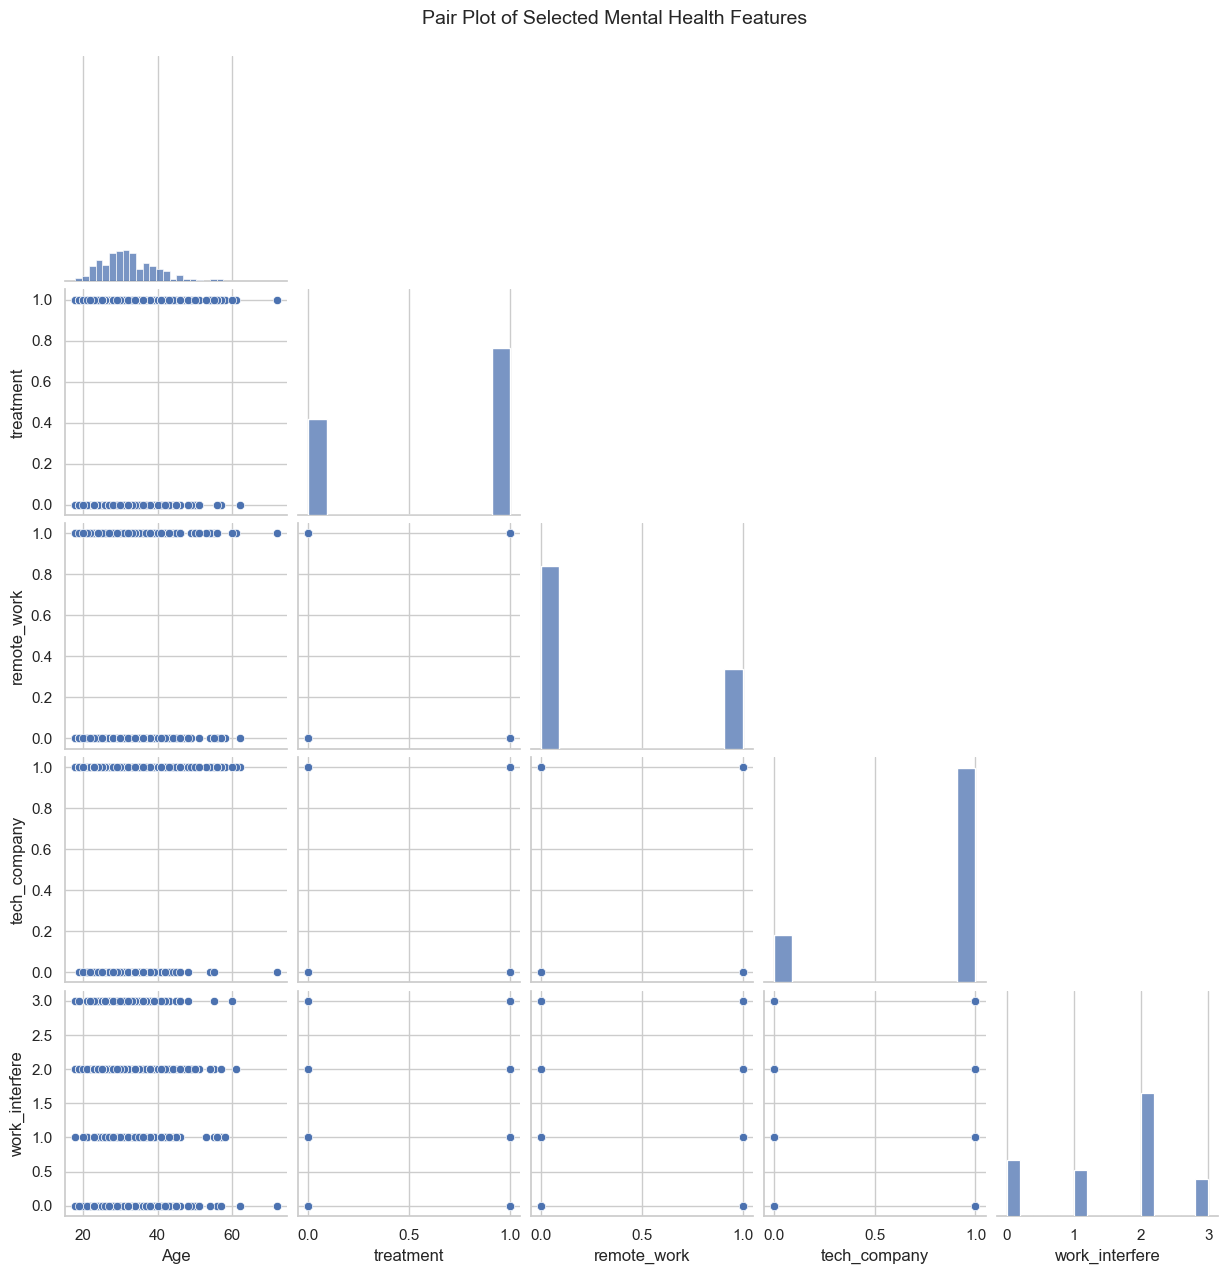

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few relevant encoded/numeric columns for pair plot
selected_columns = ['Age', 'treatment', 'remote_work', 'tech_company', 'work_interfere']

# Ensure only numeric data is passed
df_encoded = df.copy()

# Encode binary categorical columns
binary_cols = ['treatment', 'remote_work', 'tech_company', 'self_employed']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Not specified': np.nan})

# Optionally encode 'work_interfere'
df_encoded['work_interfere'] = df_encoded['work_interfere'].map({
    'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, "Don't know": np.nan
})

# Drop rows with missing values in selected columns
df_plot = df_encoded[selected_columns].dropna()

# Create the pair plot
sns.pairplot(df_plot, diag_kind='hist', corner=True)
plt.suptitle('Pair Plot of Selected Mental Health Features', y=1.02, fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is one of the most powerful tools for exploring relationships between multiple numerical variables simultaneously. It generates:

Histograms on the diagonal to show distributions

Scatterplots for every variable pair off-diagonal

Optional grouping via hue to highlight class-based separation

✔ Why it works:
Helps uncover correlation trends, clusters, and potential outliers

Allows you to see how multiple features interact with each other in a single view

Perfect for datasets with several numeric or encoded categorical features

In this case, we used it to explore relationships among:

1. Age

2. treatment (encoded)

3. remote_work (encoded)

4. tech_company (encoded)

5. work_interfere (ordinal encoded)



##### 2. What is/are the insight(s) found from the chart?

 Insight 1: Treatment Shows Patterns with Work Interference
Respondents with higher work_interfere scores (i.e., Often = 3) are more likely to have received treatment.

Shows a visual correlation consistent with what the heatmap revealed earlier.

🔹 Insight 2: No Strong Visual Separation by Age
Age doesn't show any obvious linear relationship with treatment, remote work, or tech company status.

Indicates mental health treatment needs are not age-specific in this sample.

🔹 Insight 3: No Obvious Clustering by Remote Work or Tech Status
Scatterplots involving remote_work and tech_company show no distinct pattern with other variables.

Suggests these workplace traits don’t have a strong visual influence on treatment or interference levels.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### 🎯 Objective Recap:
To understand how mental health is managed in tech workplaces and identify key drivers that influence treatment-seeking behavior and workplace comfort.

#### 📌 Recommendations for the Client
1. Improve Awareness & Communication
Many employees are unaware of available mental health resources or leave policies.

Action: Launch awareness campaigns, update onboarding materials, and use internal HR platforms to clearly explain support options.

2. Normalize Mental Health Conversations
Most employees feel uncomfortable discussing mental health with supervisors or during interviews.

Action: Train leadership in empathetic communication and promote stories of mental health openness to reduce stigma.

3. Monitor and Respond to Work Interference
Work interference is a stronger predictor of treatment than age, gender, or remote work.

Action: Conduct periodic check-ins and offer early support like flexible hours, reduced workload, or counseling options.

4. Support Small & Medium Companies
Smaller firms often lack formal policies or benefits.

Action: Provide low-cost but high-impact programs: mental health days, anonymous support access, and remote flexibility.

#### ✅ Final Takeaway:
To achieve its business objective, the company should shift focus from assumptions (like age or remote work) to behavioral triggers (like work interference). By investing in clear communication, inclusive culture, and early intervention, they can improve well-being, productivity, and retention.

# **Conclusion**

### ✅ **Final Conclusion**

This exploratory data analysis (EDA) of the 2014 Mental Health in Tech Survey reveals critical insights into how mental health is perceived, supported, and addressed in the workplace — especially within the tech industry.

Key findings show that:

* **Work interference is the strongest predictor** of whether someone seeks mental health treatment.
* Employees are **more comfortable talking to coworkers than supervisors**, revealing a gap in top-down support.
* A large portion of employees are **unsure of their rights and resources**, indicating poor communication from employers.
* Many respondents feel their companies **do not treat mental and physical health equally**, with visible hesitation to discuss mental health in job interviews.
* **Company size strongly influences mental health support**, with smaller firms falling behind in offering benefits or formal policies.

Despite increased flexibility through remote work, it does **not significantly reduce treatment needs** or perceived mental health challenges. This suggests that **policy and culture matter more than work location**.

### 🔍 Overall Conclusion:

> Mental health support in tech workplaces remains inconsistent, stigmatized, and poorly communicated. To improve employee well-being and productivity, companies must move beyond surface-level benefits and invest in **inclusive, proactive, and psychologically safe environments** — where mental health is treated with the same seriousness as physical health.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***